In [3]:
import numpy as np
import tools.QPLemail as QPLm
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pycountry_convert as pc


class AttendeesManager():

    def __init__(self, work_folder):
        self._wfolder = work_folder

    def add_email_account(self, username, password):
        self._email_mngr = QPLm.EmailManager(username=username, password=password)

    def refresh(self):
        self._countries = self.df['Country'].dropna().unique()
        self._occupations = self.df['Occupation:'].dropna().unique()
        self._fields = self.df['Field:'].dropna().unique()
        self._cities = self.df['City'].dropna().unique()
        # self._sponsors = self.df['sponsor'].dropna().unique()
        self._nr_attendees = len(self.df)

        self.save_csv()
        # self.export_gmail_mailing_list_csv()
        self.plot_field()
        self.plot_occupation()
        self.plot_country()
        # self.plot_nested()

    def import_csv(self, file_name):
        self.df = pd.read_csv(self._wfolder + file_name)
        self._fDict = self.df.to_dict()

        # Cleaning up country names
        self.df['Country'][self.df['Country'].str.contains('Croatia')] = 'Croatia'
        self.df['Country'][self.df['Country'].str.contains('Iran')] = 'Iran'
        self.df['Country'][self.df['Country'].str.contains('USA')] = 'United States'
        self.df['Country'][self.df['Country'].str.contains('UK')] = 'United Kingdom'

        self.refresh()

    def save_dictionary(self):
        self.df.to_hdf(self._wfolder + 'dict.h5', key=self.df, mode='w')
        # not working

    def save_csv(self):
        self.df.to_csv(self._wfolder + 'csv.csv')

    def plot_field(self):

        colors = 'Set2'
        size = 0.3

        plot_field = self.df['Field:'].dropna().astype('str').value_counts().plot.pie(
            fontsize=26, figsize=(20, 20), radius=1 - size, cmap=colors, wedgeprops=dict(width=size, edgecolor='w'),
            labeldistance=1 - size, legend=False, ylabel='')

        fig = plot_field.get_figure()
        fig.savefig(self._wfolder + 'pie_field.png')
        plt.pause(0.5)
        plt.close(fig)

    def plot_occupation(self):

        colors = 'Set1'
        size = 0.3

        plot_occupation = self.df['Occupation:'].dropna().astype('str').value_counts().plot.pie(
            fontsize=26, figsize=(20, 20), radius=1 - size, cmap=colors, wedgeprops=dict(width=size, edgecolor='w'),
            labeldistance=1 - size, legend=False, ylabel='')

        fig = plot_occupation.get_figure()
        fig.savefig(self._wfolder + 'pie_occupation.png')
        plt.pause(0.5)
        plt.close(fig)

    def plot_country(self):

        size = 0.3

        country_code = []
        continent = []

        for country in manager.df['Country'].dropna():

            try:
                code = pc.country_name_to_country_alpha2(country)
                country_code.append(code)

                cont = pc.country_alpha2_to_continent_code(code)
                continent.append(cont)
            except:
                print('Could not classify: ', country)

        self.df['Country_code'] = pd.Series(country_code, name='Country code')
        self.df['Continent'] = pd.Series(continent, name='Continent')

        self._no_continents = len(manager.df['Continent'].unique())


        # Continent
        group_continent = self.df.groupby(['Continent'])
        continent_labels = group_continent.Continent.describe()['count'].index
        continent_count = group_continent.Continent.describe()['count'].values

        # Country
        group_country = self.df.groupby(['Continent', 'Country_code'])
        country_labels = group_country.Continent.describe().index.get_level_values(1)
        country_count = group_country.Continent.describe()['count'].values

        cmap1 = plt.cm.Reds
        cmap2 = plt.cm.Purples
        cmap3 = plt.cm.Greens
        cmap4 = plt.cm.Blues
        cmap5 = plt.cm.Greys
        cmap6 = plt.cm.Oranges
        inner_colors = [cmap1(0.5), cmap2(.5), cmap3(.5), cmap4(.5), cmap5(.5), cmap6(.5)]

        # (np.linspace(start, stop, step) step should be unique countries in each continent!

        outer_colors = [*cmap1(np.linspace(0, 0.5, int(continent_count[0]))), *cmap2(np.linspace(0, 0.5, continent_count[1])),
                        *cmap3(np.linspace(0, 0.5, continent_count[2])), *cmap4(np.linspace(0, 0.5, continent_count[3])),
                        *cmap5(np.linspace(0, 0.5, continent_count[4])), *cmap6(np.linspace(0, 0.5, continent_count[5]))]



        fig = plt.figure(figsize=(20, 20))

        plt.rcParams.update({'font.size': 22, 'font.family': 'Tahoma'})
        plt.pie(continent_count, labels=continent_labels, radius=1-size, wedgeprops=dict(width=size, edgecolor='w'),
                labeldistance=1 - size, colors=inner_colors, rotatelabels=True)

        plt.rcParams.update({'font.size': 8, 'font.family': 'Tahoma'})
        plt.pie(country_count, labels=country_labels, radius=1, wedgeprops=dict(width=size, edgecolor='w'),
                labeldistance=1 - (size/2), colors=outer_colors, rotatelabels=True)

        fig.savefig(self._wfolder + 'pie_country.png')
        # plt.pause(3)
        plt.close(fig)

    def plot_nested(self):

        size = 0.3
        inner_colors = 'Set1'
        outer_colors = 'Set2'

        plot_occupation = self.df['Occupation:'].dropna().astype('str').value_counts().plot.pie(
            fontsize=26, figsize=(20, 20), radius=1 - size, cmap=inner_colors, wedgeprops=dict(width=size, edgecolor='w'),
            labeldistance=1 - size, legend=False)

        plot_field = self.df['Field:'].dropna().astype('str').value_counts().plot.pie(
            fontsize=26, radius=1, cmap=outer_colors, wedgeprops=dict(width=size, edgecolor='w'), labeldistance=1 - 0.2, ylabel='', legend=False)

        fig = plot_field.get_figure()
        fig.savefig(self._wfolder + 'pie_nested.png')
        plt.pause(0.5)
        plt.close(fig)

    def add_attendee(self, firstname, lastname, email, title, institution, city, country, occupation, field, sponsor):

        new_attendee = pd.DataFrame(data=np.array([[self.df['#'].astype('int').max() + 1, np.nan, title, firstname,
                                                    lastname, email, institution, city, country, occupation, field,
                                                    np.nan, np.nan, sponsor]]), columns=self.df.columns)

        self.df = self.df.append(new_attendee, sort=True, ignore_index=True)

        self.refresh()

    def export_gmail_mailing_list_csv(self):
        full_names = pd.Series(data=self.df['First Name'] + ' ' + self.df['Last Name'], name='Full Name')

        self.df_mail = pd.DataFrame({'Full Name': full_names, 'Email': self.df['Email']})

        self.df_mail.to_csv(self._wfolder + 'emails.csv')

    def send_to_all(self, message, subject='MLQ2021', replace_fields=True):

        for attendee, name in enumerate(self.df_mail['Full Name']):

            personal_message = message.format(Name=name)

            # self._email_mngr.send(to=[self.df_mail['Email'][attendee], 'mlq2021.conference@gmail.com'], subject=subject,
            #                       message=personal_message)

        # will send only last email

        self._email_mngr.send(to=[self.df_mail['Email'][attendee]], subject=subject, message=personal_message)

        print(personal_message, '\nEmail: ', self.df_mail['Email'][attendee])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: 

TypeError: pie() got an unexpected keyword argument 'ylabel'

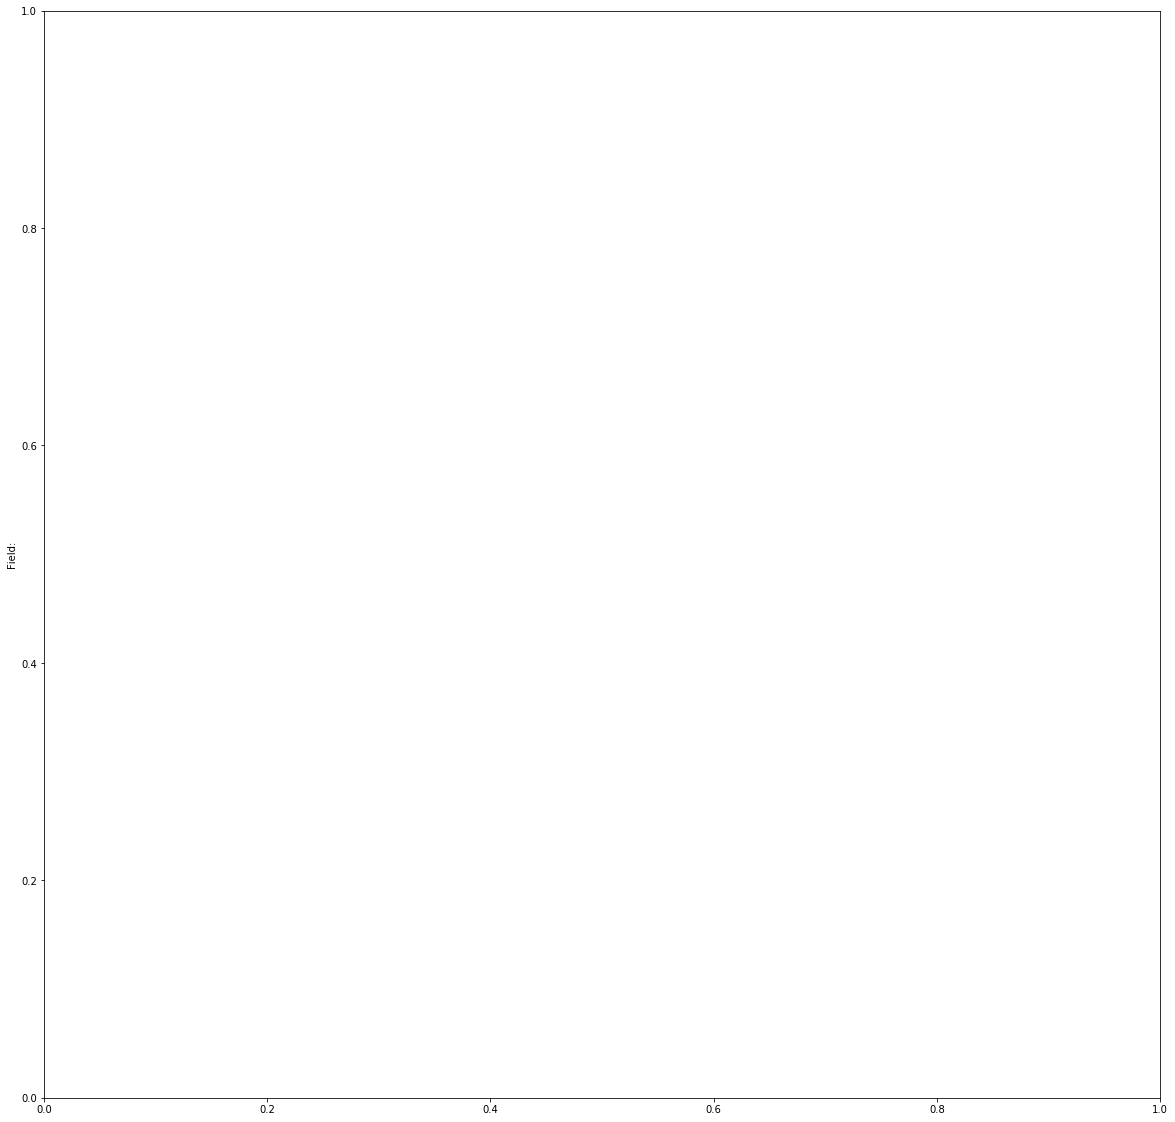

In [4]:
database_directory = 'C:/Users/dw29/Dropbox (Heriot-Watt University Team)/RES_EPS_Quantum_Photonics_Lab/Events/MLQ2021/'

database_filename = '20210228_attendees.csv'

manager = AttendeesManager(work_folder=database_directory)
manager.import_csv(file_name=database_filename)